# Perkenalan dan Objectives



1.   Nama : Rifqi Julian Hasyari
2.   Batch : HCK 006





1.   Latar Belakang
> Saya merupakan data analyst dari sebuah bank di indonesia. Perusahaan saya meminta untuk membuat model prediksi siapa yang kemungkinan gagal bayar pada produk pinjaman konsumen. Mereka memiliki data tentang perilaku pelanggan masa lalu berdasarkan pengamatan yang telah mereka lakukan. Oleh karena itu, ketika mereka memiliki pelanggan baru, mereka ingin memprediksi siapa yang berisiko gagal bayar lebih tinggi dan siapa yang tidak. Dengan kata lain, organisasi ingin mengembangkan model prediktif yang dapat melihat data perilaku pelanggan, seperti salary, status, profesi, dll. dan berdasarkan data ini, model memberikan perkiraan seberapa besar kemungkinan seseorang akan mengalami masalah pembayaran di masa mendatang. Tujuannya adalah untuk membantu institusi mengambil tindakan pencegahan terhadap pelanggan berisiko tinggi lebih cepat, sehingga mereka dapat mengelola risiko kredit dengan lebih baik dan mengurangi potensi kerugian jika terjadi gagal bayar.

2. Objective


*   Membuat model prediksi terhadap pelanggan gagal bayar peminjaman
*   Mendapatkan insight bagi perusahaan mengenai perilaku customer berdasarkan dataset yang kita miliki.



# Import Libraries

In [1]:
!pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 6.4 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.utils import resample
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import train_test_split
import phik
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings(action='ignore')

#Data Loading

In [3]:
Data=pd.read_csv('Training Data.csv')
Data

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


Berdasarkan output diatas dapat dilihat bahwa terdapat 252000 rows dan 13 kolom yang ada pada dataset kita.

In [4]:
Data['risk_flag'].value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

Dapat dilihat bahwa data target kita memiliki imbalance data yang sangat jauh dan nanti nya kita akan handling agar model kita dapat melakukan prediksi sama baiknya untuk 2 kategori tersebut.

In [5]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [6]:
Data.isna().sum()

Id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64

Tidak terdapat missing value sehingga kita tidak perlu melakukan handling missing value.

In [7]:
Data.drop(columns=['Id'], inplace=True)

Melakukan drop id dikarenakan id sama saja seperti index.

#EDA FOR BUSINESS INSIGHT

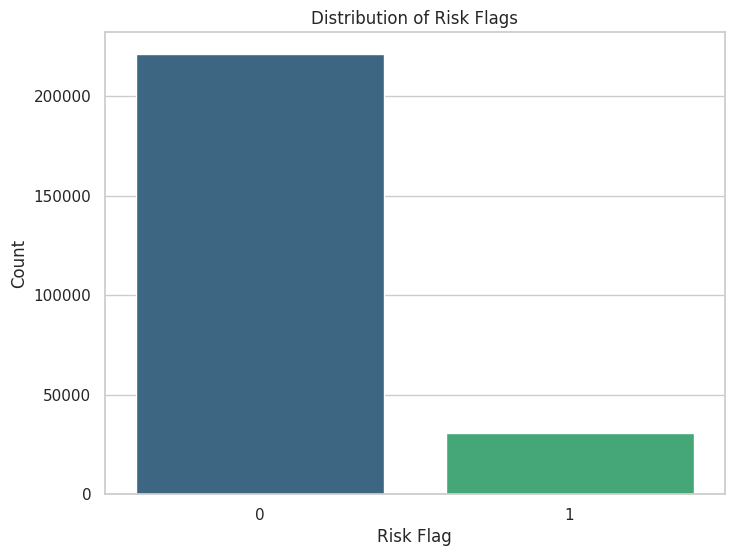

In [8]:
# Menghitung jumlah masing-masing kategori dalam kolom "risk flag"
risk_flag_counts = Data['risk_flag'].value_counts()

# Membuat bar plot menggunakan Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=risk_flag_counts.index, y=risk_flag_counts.values, palette="viridis")
plt.title("Distribution of Risk Flags")
plt.xlabel("Risk Flag")
plt.ylabel("Count")
plt.show()

Dapat dilihat bahwa customer yang memiliki resiko peminjaman yang beresiko tinggi hanya sedikit dibandingkan keseluruhan data. Namun angka 30000 merupakan angka yang banyak sehingga kita perlu untuk memerhatikannya.

In [9]:
Data['age'].unique()

array([23, 40, 66, 41, 47, 64, 58, 33, 24, 78, 22, 28, 57, 48, 39, 72, 56,
       54, 50, 35, 76, 38, 31, 52, 59, 21, 26, 55, 45, 77, 71, 63, 30, 25,
       73, 75, 27, 74, 67, 46, 68, 36, 79, 42, 60, 32, 65, 49, 61, 29, 37,
       69, 62, 53, 70, 34, 43, 44, 51])

In [10]:
# Membuat kolom baru dengan inisialisasi nilai kosong
Data['age_group'] = ""

# Melakukan loop untuk setiap baris dalam DataFrame
for index, row in Data.iterrows():
    age = row['age']
    # Mengelompokkan umur berdasarkan rentang
    if 20 <= age <= 30:
        Data.at[index, 'age_group'] = 'Milenial'
    elif 31 <= age <= 50:
        Data.at[index, 'age_group'] = 'Dewasa'
    elif 51 <= age <= 80:
        Data.at[index, 'age_group'] = 'Orang Tua'

# Menampilkan hasil
print(Data[['age', 'age_group']].head())

   age  age_group
0   23   Milenial
1   40     Dewasa
2   66  Orang Tua
3   41     Dewasa
4   47     Dewasa


Membuat kolom baru bernama age group atau pengelompokan berdasarkan umur.

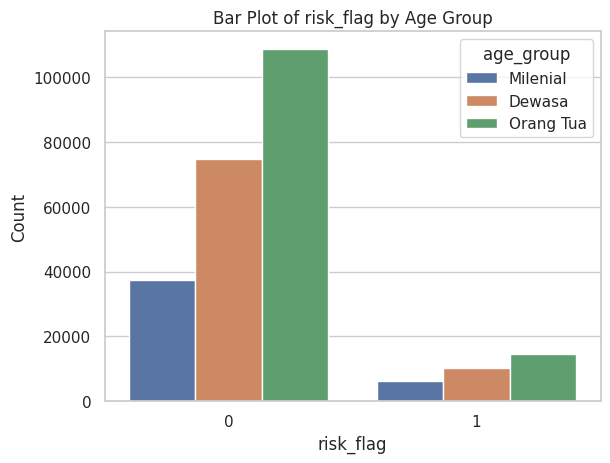

In [11]:
data_plot = pd.concat([Data['age_group'], Data['risk_flag']], axis=1)
sns.countplot(x="risk_flag", hue="age_group", data=data_plot)
plt.xlabel("risk_flag")
plt.ylabel("Count")
plt.title("Bar Plot of risk_flag by Age Group")

plt.show()


Berdasarkan bar plot diatas dapat dilihat bahwa kelas umur orang tua memiliki data yang lebih banyak dibandingkan kelas umur lainnya.

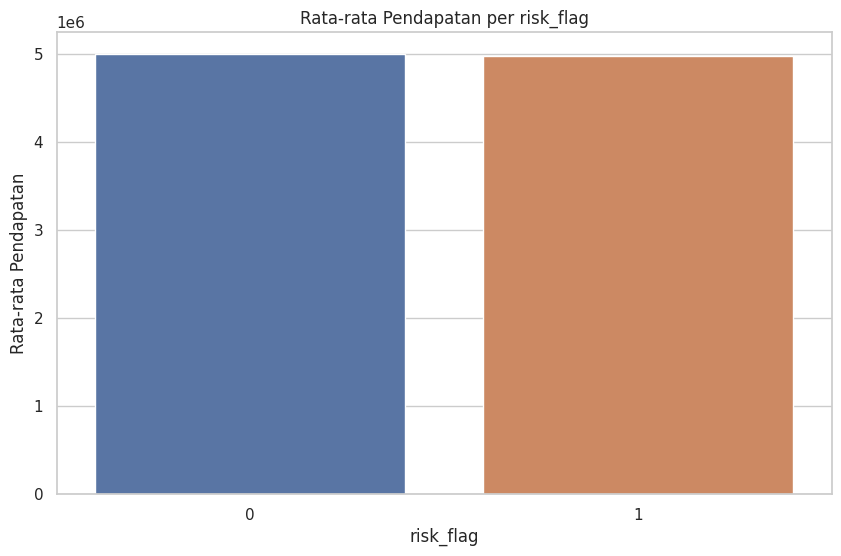

In [12]:

data_plot = pd.concat([Data['risk_flag'], Data['income']], axis=1)


average_income = data_plot.groupby('risk_flag')['income'].mean().reset_index()

plt.figure(figsize=(10, 6))  # Mengatur ukuran plot
sns.barplot(x="risk_flag", y="income", data=average_income)
plt.xlabel("risk_flag")
plt.ylabel("Rata-rata Pendapatan")
plt.title("Rata-rata Pendapatan per risk_flag")
plt.show()

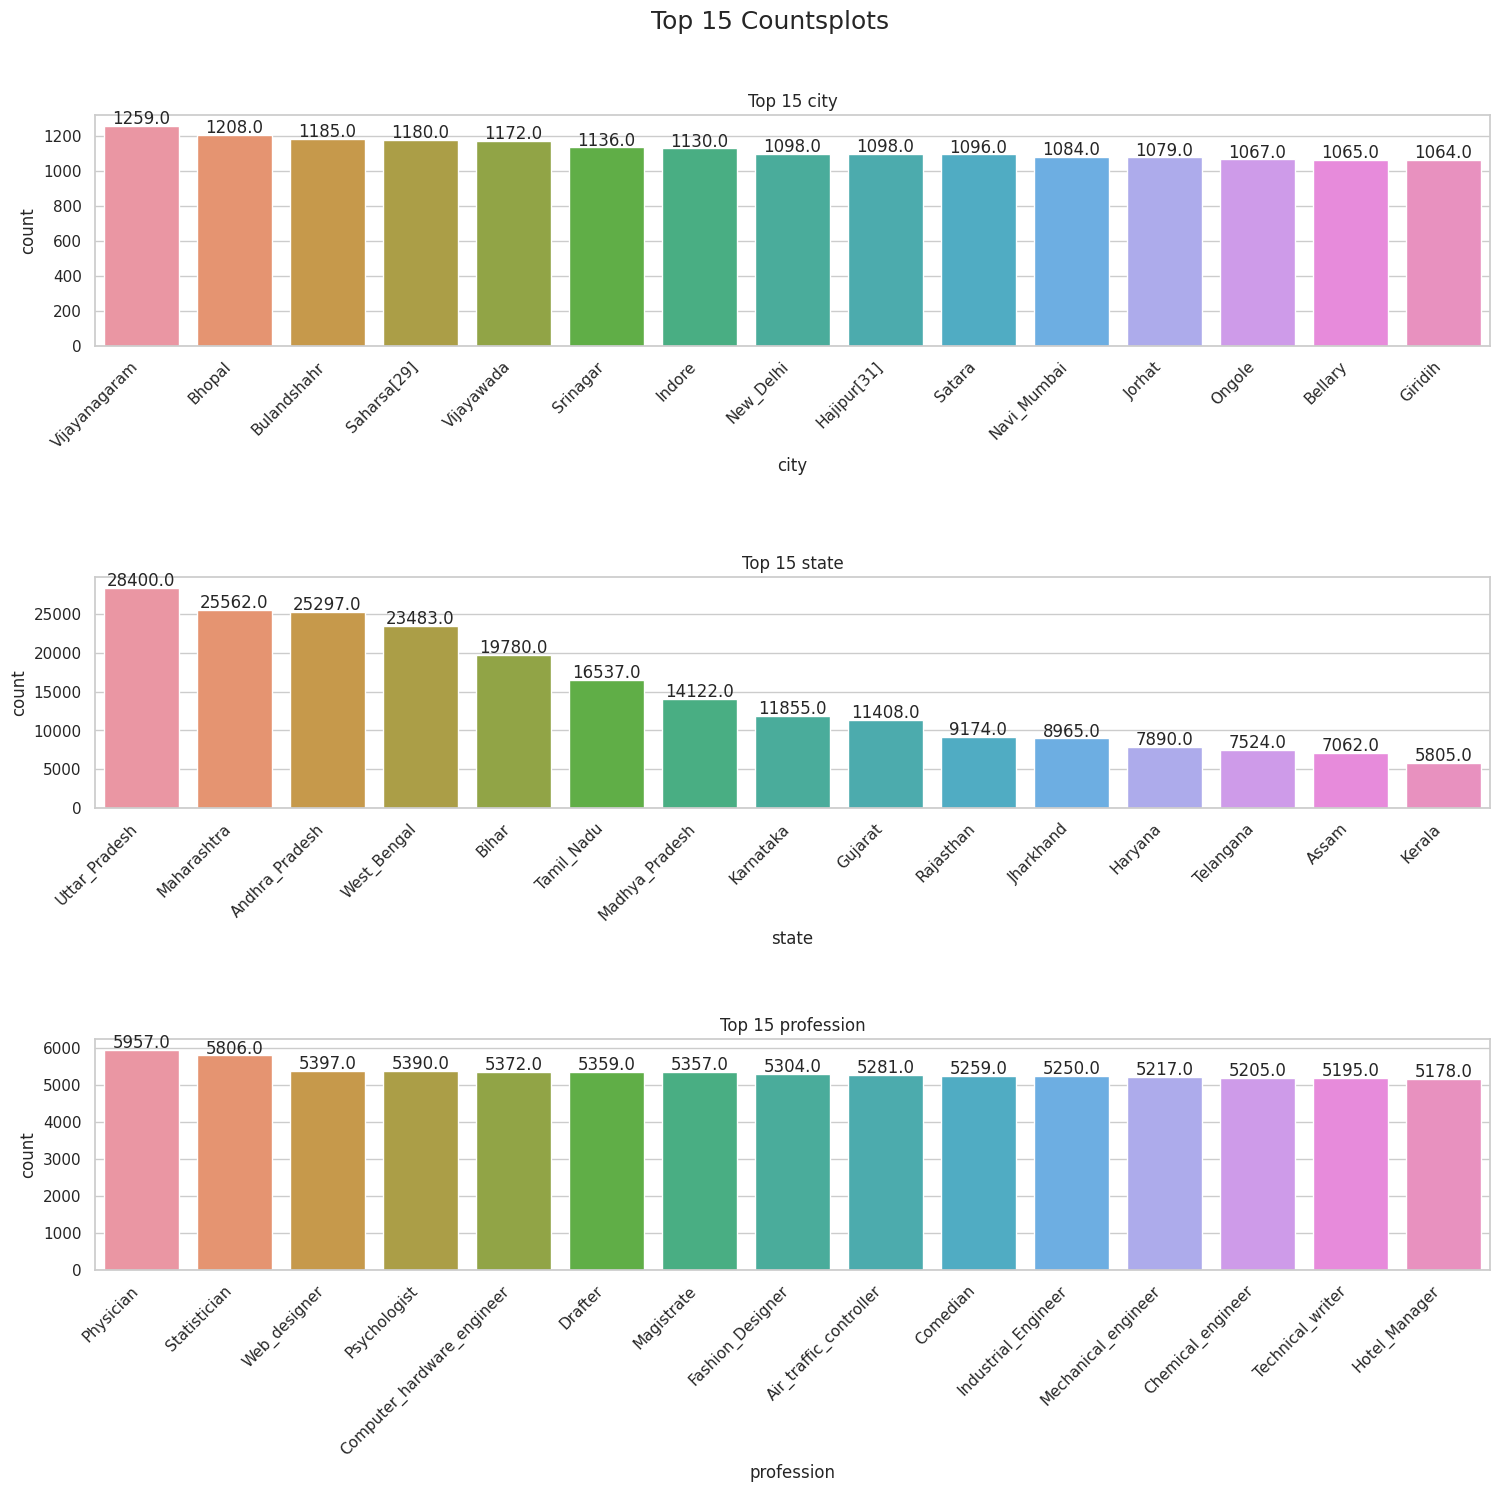

In [13]:
# futher examin in City, STATE, Profession
# Top 15 counts for City , State, Profession variables

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(18, 15))
plt.subplots_adjust(hspace=1)
fig.suptitle("Top 15 Countsplots", fontsize=18, y=0.95)


#Construct subplots
for col , ax in zip(['city','state', 'profession'] , axs.ravel()):
    countplot = sns.countplot(ax = ax ,data=Data,  x= col , order=Data[col].value_counts().iloc[:15].index)
    countplot.set_title("Top 15 "+ col)
    countplot.set_xticklabels(countplot.get_xticklabels(), rotation=45, horizontalalignment='right')
    for p in countplot.patches:
        countplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.show()

Output diatas merupakan bar plot top 15 city,state serta profesi yang paling banyak muncul di dalam dataset yang kita miliki. Insight yang didapatkan adalah kita dapat mengetahui bahwa customer kita mayoritas ada di kota mana, state mana dan profesinya apa.

In [14]:
# Comparing the Top 5th Counts category with the Last 5th counts category
# Create a function that will produce two coutplots with respective counts comparision
def generate_count_plots(df , column_name):
    # Count the occurrences of each category in the column
    value_counts = df[column_name].value_counts()

    # Get the top 5 and bottom 5 categories based on their counts
    top_5_categories = value_counts.head(5)
    bottom_5_categories = value_counts.tail(5)

    # Create a figure with two subplots (top 5 and bottom 5)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

     # Plot the top 5 categories
    top_plot = sns.barplot(x=top_5_categories.index, y=top_5_categories.values, ax=axes[0])

    axes[0].set_title(f"Top 5  - {column_name}")
    axes[0].set_ylabel("Count")
    top_plot.set_xticklabels(top_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
    for p in top_plot.patches:
        top_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # Plot the bottom 5 categories

    bottom_plot = sns.barplot(x=bottom_5_categories.index, y=bottom_5_categories.values, ax=axes[1])

    axes[1].set_title(f"Bottom 5  - {column_name}")
    axes[1].set_xlabel(f"{column_name}")
    axes[1].set_ylabel("Count")
    bottom_plot.set_xticklabels(bottom_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
    for p in bottom_plot.patches:
        bottom_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center', xytext=(0, 5), textcoords='offset points')



    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

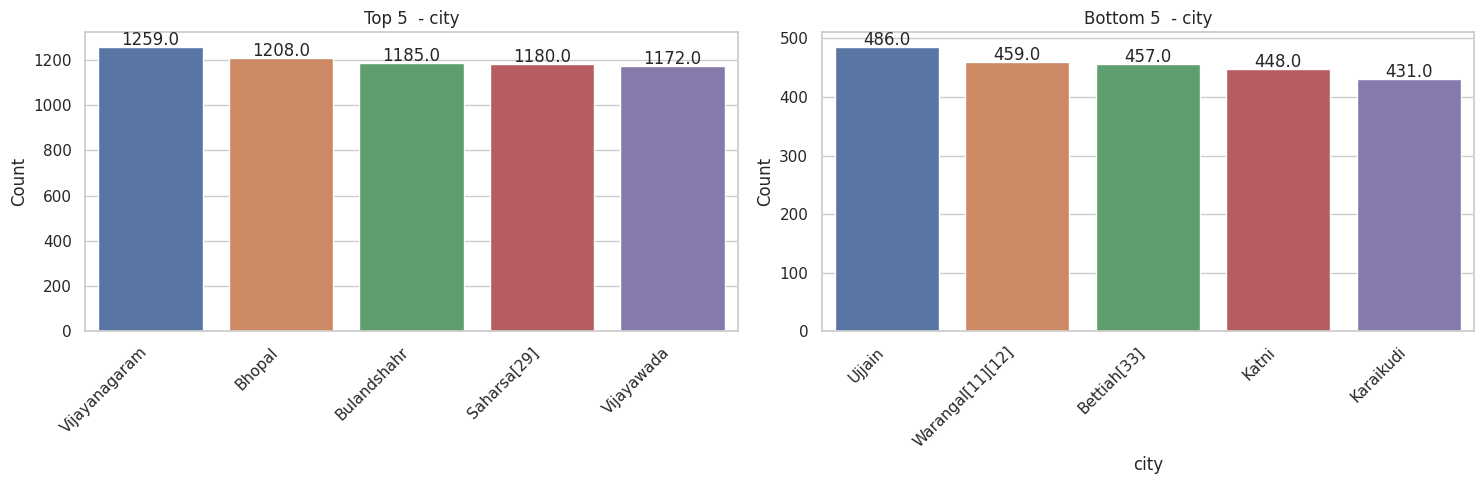

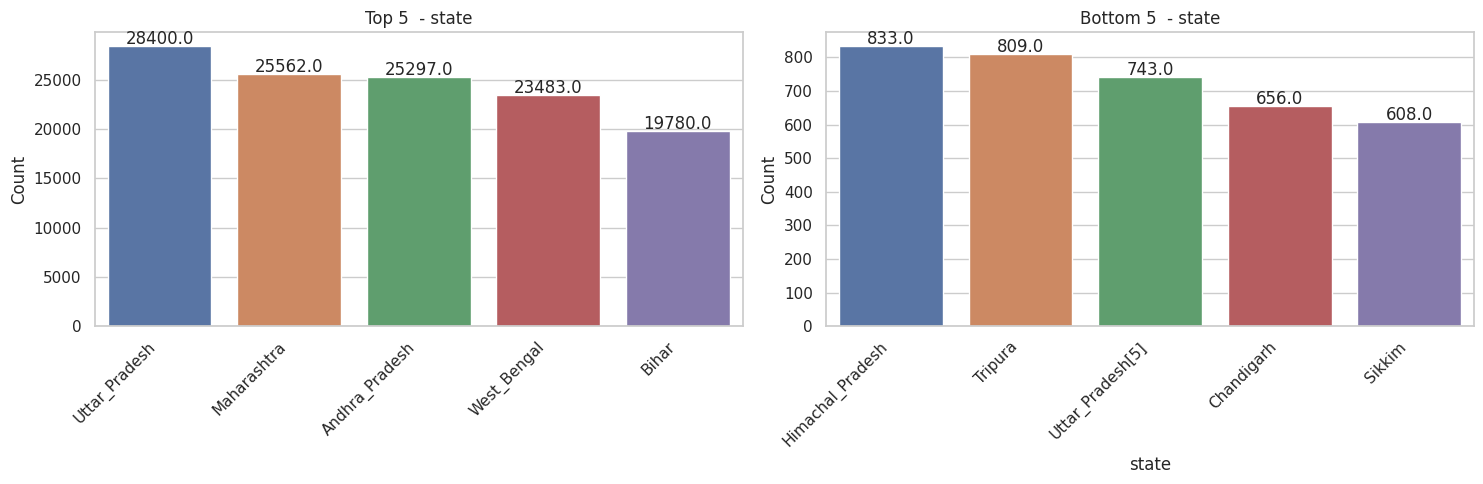

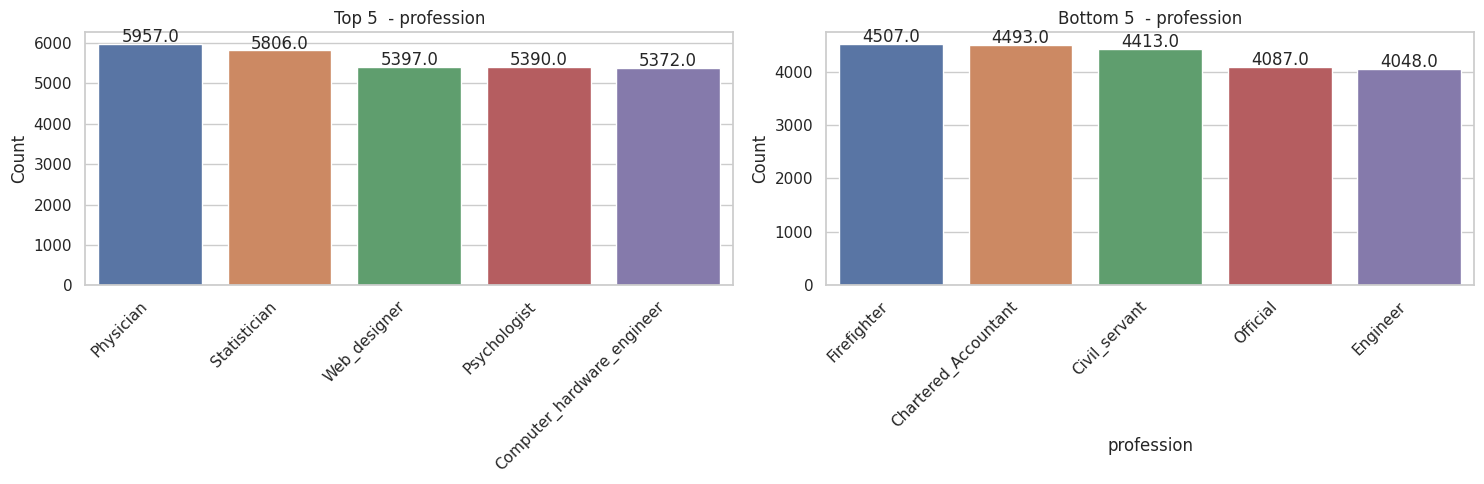

In [15]:
#Generating the plots
for col in ['city','state', 'profession']:
    generate_count_plots(Data, col)

Bar plot diatas hampir sama dengan yang sebelumnya namun pada bar plot ini juga menunjukan 5 terbawah. Sehingga dapat kita cari strategi marketing yang tepat untuk meningkatkan jumlah customer di kota,state dan juga profinsi yang memiliki customer terdikit.

#Pre processing data

In [16]:
#UnderSampling
mayoritas = Data[Data['risk_flag'] == 0]  #mayoritas
minoritas = Data[Data['risk_flag'] == 1]  #minoritas

undersample = resample(mayoritas,
                                replace=False,    # Without replacement
                                n_samples=len(minoritas),  # Match minority class size
                                random_state=42)  # For reproducibility

# Concatenate the downsampled majority class with the minority class
Data = pd.concat([undersample, minoritas])

In [17]:
Data['risk_flag'].value_counts()

0    30996
1    30996
Name: risk_flag, dtype: int64

Kolom diatas adalah kolom untuk melakukan handling imbalance data dengan menggunakan undersampling.

In [18]:
Data.columns

Index(['income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years', 'risk_flag', 'age_group'],
      dtype='object')

In [19]:
selected_columns = ['married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state']
Cat_cols = Data[selected_columns]

In [20]:
# categorical overview
for i in Cat_cols:
    print('Column: ',i)
    print('Total unique labels: ', Data[i].nunique())
    print('-' * 30)

Column:  married
Total unique labels:  2
------------------------------
Column:  house_ownership
Total unique labels:  3
------------------------------
Column:  car_ownership
Total unique labels:  2
------------------------------
Column:  profession
Total unique labels:  51
------------------------------
Column:  city
Total unique labels:  317
------------------------------
Column:  state
Total unique labels:  29
------------------------------


Berdarkan output diatas dapat dilihat bahwa kategorikal kolom kita masih ada terdapat high cardinality yang nantinya akan kita handling jika dibutuhkan.

In [21]:
Data['profession'].unique()

array(['Firefighter', 'Flight_attendant', 'Chartered_Accountant',
       'Statistician', 'Architect', 'Aviator', 'Surveyor',
       'Petroleum_Engineer', 'Chef', 'Consultant',
       'Technology_specialist', 'Official', 'Politician', 'Artist',
       'Design_Engineer', 'Psychologist', 'Technician', 'Surgeon',
       'Software_Developer', 'Computer_hardware_engineer',
       'Biomedical_Engineer', 'Drafter', 'Web_designer',
       'Mechanical_engineer', 'Fashion_Designer', 'Industrial_Engineer',
       'Graphic_Designer', 'Engineer', 'Technical_writer', 'Dentist',
       'Magistrate', 'Civil_engineer', 'Economist', 'Geologist',
       'Analyst', 'Civil_servant', 'Lawyer', 'Physician', 'Scientist',
       'Computer_operator', 'Hotel_Manager', 'Air_traffic_controller',
       'Police_officer', 'Comedian', 'Secretary', 'Designer',
       'Army_officer', 'Microbiologist', 'Librarian', 'Chemical_engineer',
       'Financial_Analyst'], dtype=object)

In [22]:
profession_groups = {
    'Profesional Kesehatan': ['Surgeon', 'Dentist', 'Physician', 'Microbiologist'],
    'Profesional Teknik': ['Architect', 'Aviator', 'Surveyor', 'Petroleum_Engineer', 'Technology_specialist',
                           'Design_Engineer', 'Mechanical_engineer', 'Biomedical_Engineer', 'Drafter',
                           'Web_designer', 'Computer_hardware_engineer', 'Industrial_Engineer',
                           'Graphic_Designer', 'Engineer', 'Technical_writer', 'Civil_engineer', 'Geologist',
                           'Chemical_engineer'],
    'Profesional Keuangan dan Bisnis': ['Chartered_Accountant', 'Consultant', 'Economist', 'Analyst', 'Financial_Analyst'],
    'Pekerjaan Pemerintah dan Layanan Publik': ['Official', 'Politician', 'Civil_servant', 'Magistrate', 'Police_officer', 'Army_officer'],
    'Seni dan Kreativitas': ['Artist', 'Fashion_Designer', 'Designer', 'Comedian'],
    'Profesional Teknikal': ['Computer_operator', 'Air_traffic_controller', 'Librarian'],
    'Manajemen dan Bisnis': ['Chef', 'Hotel_Manager', 'Secretary'],
    'Bidang Khusus': ['Psychologist', 'Technician', 'Scientist']
}

In [23]:
# Fungsi untuk mengelompokkan berdasarkan profesi
def group_profession(profession):
    for group, professions_in_group in profession_groups.items():
        if profession in professions_in_group:
            return group
    return 'other'

# Membuat kolom baru "Profession_Group" dengan hasil pengelompokkan
Data['Profession_Group'] = Data['profession'].apply(group_profession)

# Tampilkan DataFrame hasil pengelompokkan
Data


,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag,age_group,Profession_Group
183374,2158013,21,6,single,owned,yes,Firefighter,Thanjavur,Tamil_Nadu,6,10,0,Milenial,other
12647,1681428,78,6,single,rented,no,Flight_attendant,Pali,Rajasthan,3,11,0,Orang Tua,other
167202,3326988,42,7,single,rented,no,Chartered_Accountant,Anand,Gujarat,7,14,0,Dewasa,Profesional Keuangan dan Bisnis
116024,1039697,65,3,single,rented,no,Statistician,Cuttack,Odisha,3,14,0,Orang Tua,other
27562,1413733,25,2,single,rented,yes,Architect,Sri_Ganganagar,Rajasthan,2,14,0,Milenial,Profesional Teknik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251973,1244622,35,15,single,rented,no,Psychologist,Alwar,Rajasthan,3,11,1,Dewasa,Bidang Khusus
251977,1330613,63,19,single,rented,no,Engineer,Purnia[26],Bihar,13,12,1,Orang Tua,Profesional Teknik
251981,1796713,47,2,single,rented,no,Technician,Kolhapur,Maharashtra,2,12,1,Dewasa,Bidang Khusus
251982,3182290,52,2,single,rented,no,Drafter,Naihati,West_Bengal,2,10,1,Orang Tua,Profesional Teknik


Kolom diatas adalah handling high cardinality yang ada pada kolom profesi. Kita menggabungkan profesi menjadi beberapa bidang nya saja.

In [24]:
Data.isna().sum()

income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
age_group              0
Profession_Group       0
dtype: int64

interval columns not set, guessing: ['income', 'age', 'experience', 'current_job_years', 'current_house_years', 'risk_flag']


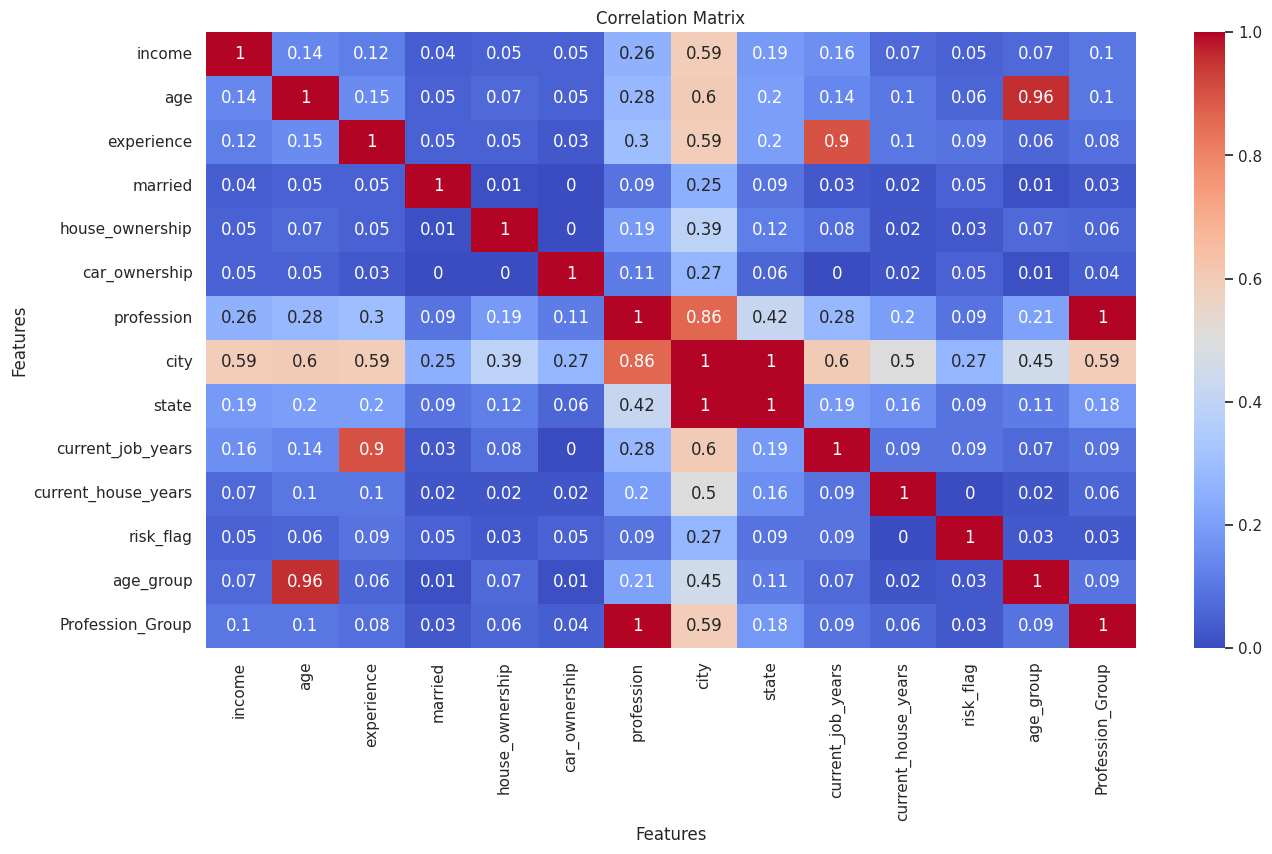

In [25]:
# Assuming you already have the 'phik_overview' correlation matrix
phik_overview = Data.phik_matrix()

# Round the correlation values to two decimal places
phik_overview_rounded = phik_overview.round(2)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(phik_overview_rounded, annot=True, cmap='coolwarm', vmin=0, vmax=1, xticklabels=phik_overview.columns, yticklabels=phik_overview.index)
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [26]:
#split data
X = Data.drop(['age_group','risk_flag','city','profession'], axis=1)
y = Data['risk_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)


(43394, 10)
(18598, 10)
(43394,)
(18598,)


Kolom diatas berfungsi untuk melakukan spliting data. Pada fitur saya tidak menggunakan kolom city dikarenakan agar cakupannya lebih luas saya menggunakan state dan profesi tidak digunakan karena saya menggunakan kolom profesi yang telah di handling high cardinality nya.

In [27]:
Data.columns

Index(['income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years', 'risk_flag', 'age_group', 'Profession_Group'],
      dtype='object')

In [28]:
def normal(df,col):
    upper = df[col].mean() + (3 * df[col].std())
    lower = df[col].mean() - (3 * df[col].std())

    outlier = df[(df[col] <= lower) | (df[col] >= upper)]

    print('percentage: ', len(outlier)/df.shape[0] * 100, '%')

def skew(df, col, fold):
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)

    IQR = Q3 - Q1

    upper = Q3 + (fold*IQR)
    lower = Q1 - (fold*IQR)

    outlier = df[(df[col] <= lower) | (df[col] >= upper)]

    print('percentage: ', len(outlier)/df.shape[0] * 100, '%')
    print('upper: ', upper)
    print('lower: ', lower)

#Function to plot distribution
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))

    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()

    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")

    plt.show()

    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
        normal(df, col)
    elif df[col].skew() > 0.5:
        if df[col].skew() > 1:
            print("Columns '{}' extreme right skewed".format(col))
            skew(df, col, 3)
        else:
            print("Columns '{}' right skewed".format(col))
            skew(df, col, 1.5)
    elif df[col].skew() < -0.5:
        if df[col].skew() < 1:
            print("Columns '{}' extreme left skewed".format(col))
            skew(df, col, 3)
        else:
            print("Columns '{}' left skewed".format(col))
            skew(df, col, 1.5)

kolom diatas merupakan fungsi untuk cek skew dan outlier pada data.

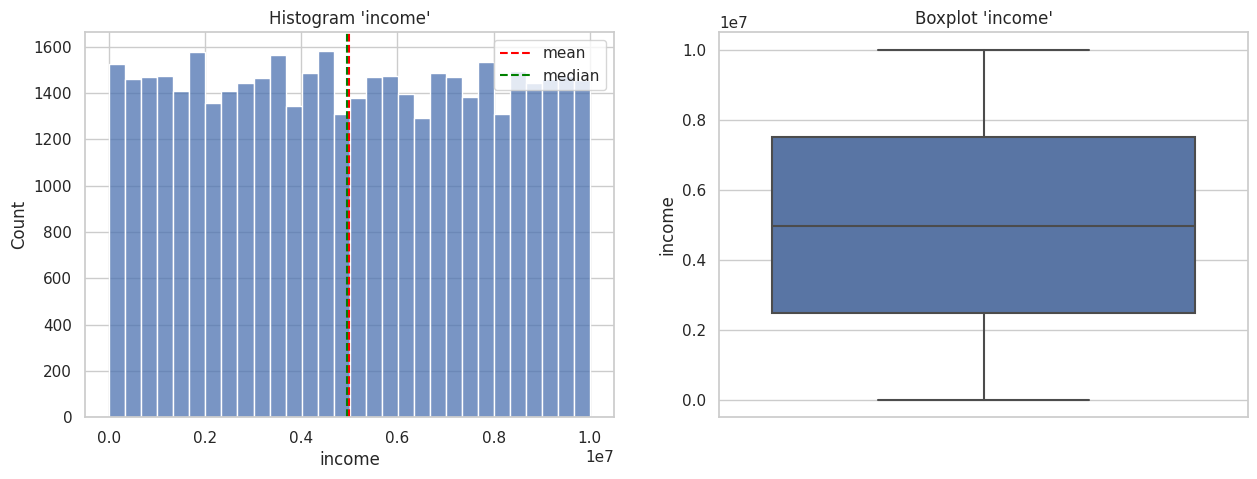

income Kurtosis: -1.2089126047548198
income Skewness: 0.007738137268736926
Columns 'income' normal distribution
percentage:  0.0 %


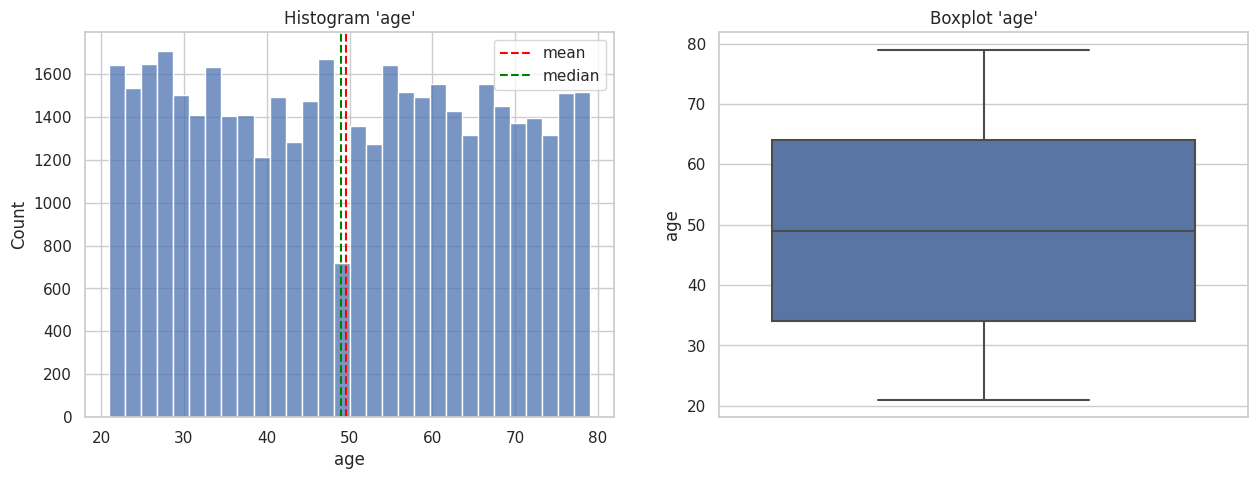

age Kurtosis: -1.2178570055042517
age Skewness: 0.01840748367059947
Columns 'age' normal distribution
percentage:  0.0 %


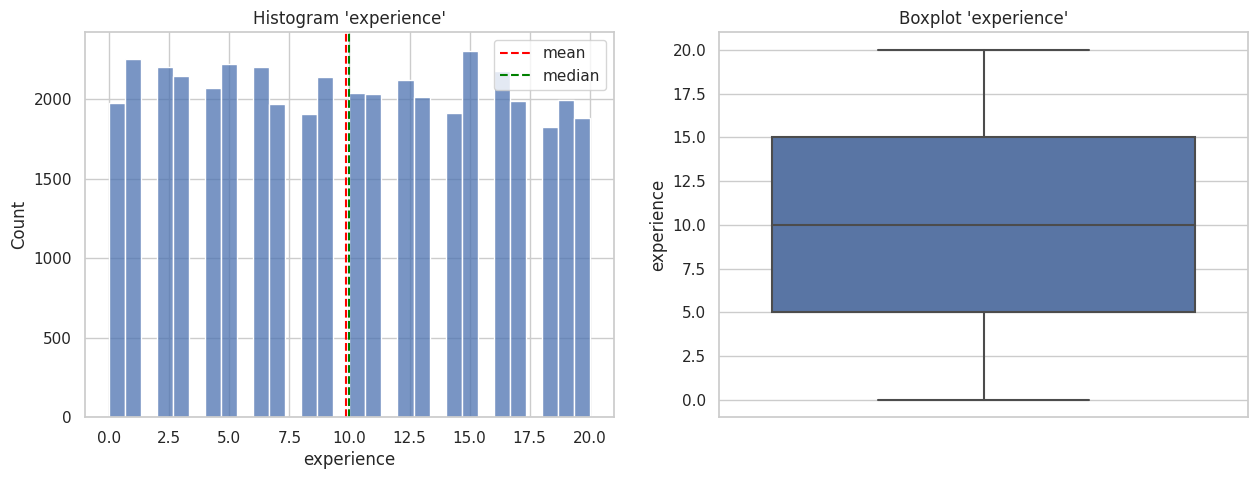

experience Kurtosis: -1.2111773816445248
experience Skewness: 0.02620665958370897
Columns 'experience' normal distribution
percentage:  0.0 %


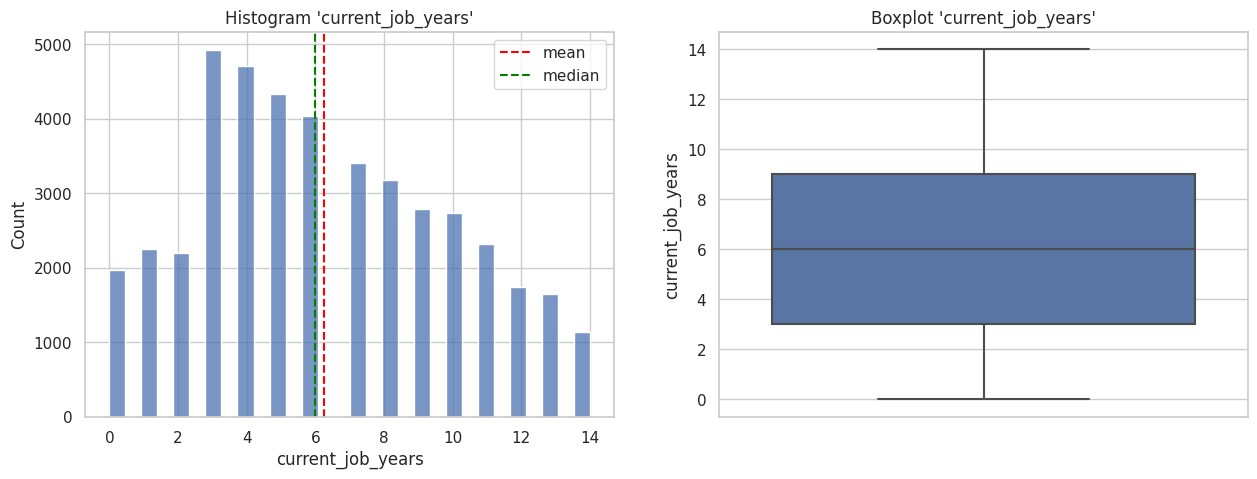

current_job_years Kurtosis: -0.800119523220371
current_job_years Skewness: 0.2823155424090686
Columns 'current_job_years' normal distribution
percentage:  0.0 %


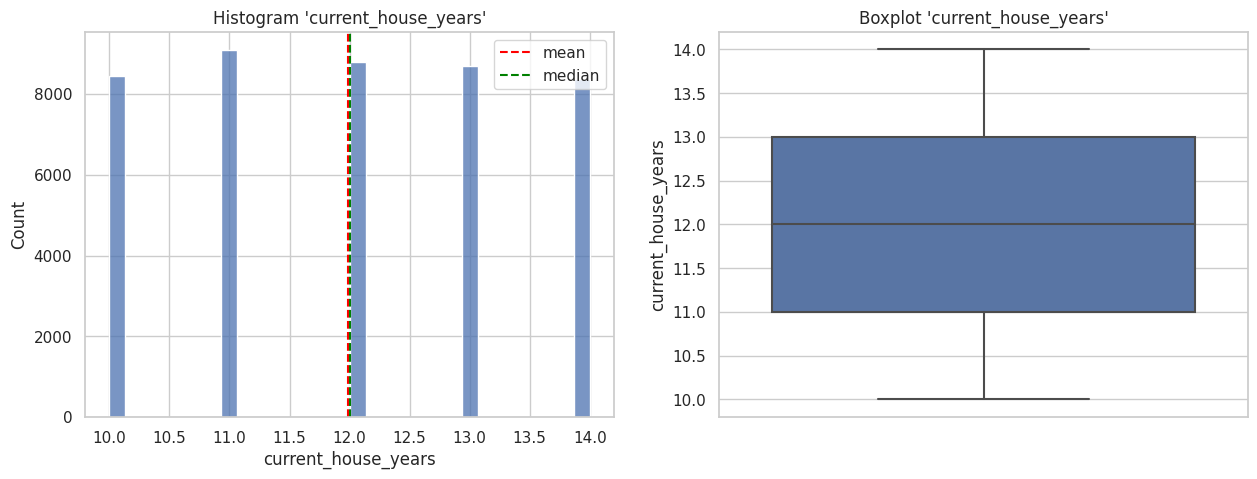

current_house_years Kurtosis: -1.2784627505252797
current_house_years Skewness: 0.018984145725411516
Columns 'current_house_years' normal distribution
percentage:  0.0 %


In [29]:
# List kolom yang ingin Anda plot
kolom_terpilih = ['income', 'age', 'experience','current_job_years',
       'current_house_years']

for col in kolom_terpilih:
    plot_dist(X_train, col)

Berdasarkan histogram plot diatas dapat dilihat untuk kolom numerikal yang kita miliki semua memiliki distribusi normal dan tidak terdapat outlier sehingga kita tidak perlu handling outlier.

In [30]:
num_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])
num_tr = num_pipeline.fit_transform(X_train[['income', 'age', 'experience','current_job_years',
       'current_house_years']])

Membuat pipeline untuk data numerical, disini saya hanya menggunakan scaler.

In [31]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

cat_tr = cat_pipeline.fit_transform(X_train[['married', 'house_ownership', 'car_ownership','Profession_Group',  'state']])

Membuat pipleine untuk data kategorikal, disini saya menggunakan simple imputer untuk mencegah adanya missing value dan juga melakukan encoding dengan menggunakan onehotencoder.

In [32]:
full_pipeline = ColumnTransformer([
        ('num1', num_pipeline, ['income', 'age', 'experience','current_job_years','current_house_years']),
        ('cat1', cat_pipeline, ['married', 'house_ownership', 'car_ownership','Profession_Group', 'state'])

    ])
train_tr = full_pipeline.fit_transform(X_train)

Menggabungkan seluruh pipeline menjadi full_pipeline.

In [33]:
test_tr = full_pipeline.transform(X_test)

Mengapply pipeline tersebut ke dalam X_test

In [34]:
full_pipeline

ColumnTransformer(transformers=[('num1',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['income', 'age', 'experience',
                                  'current_job_years', 'current_house_years']),
                                ('cat1',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 ['married', 'house_ownership', 'car_ownership',
                                  'Profession_Group', 'state'])])

#Model definition

In [35]:
logreg = LogisticRegression(random_state=0)
svc = SVC(random_state=0)
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

In [36]:
logreg.fit(train_tr, y_train)

LogisticRegression(random_state=0)

## Logistic Regression

In [37]:
# cross-val
logreg_pipe = Pipeline([
        ('preprocess', full_pipeline),
        ('model', LogisticRegression(random_state=0))
    ])

scores_logreg = cross_val_score(logreg_pipe, X_train, y_train,
                        scoring='accuracy', cv=10)
print(scores_logreg)
print(scores_logreg.mean())


[0.53479263 0.54470046 0.53870968 0.54078341 0.54182991 0.53122839
 0.52961512 0.54597834 0.53768149 0.53583775]
0.5381157182259712


Confusion Matrix Train: 
Confusion Matrix Test: 


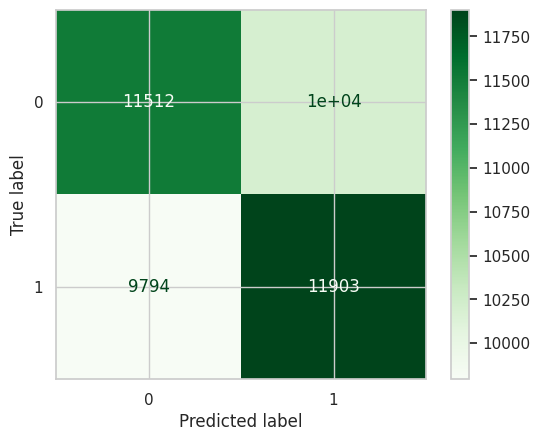

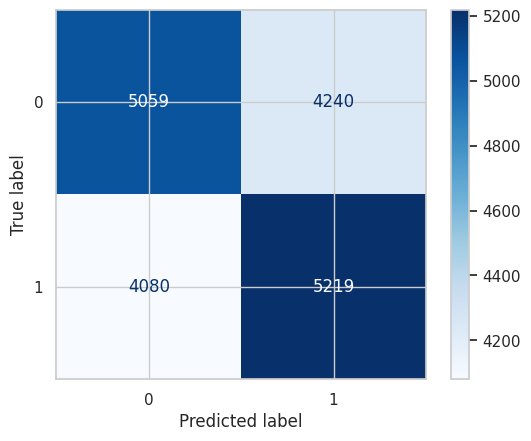

In [38]:
print('Confusion Matrix Train: \n', ConfusionMatrixDisplay.from_estimator(logreg, train_tr, y_train, cmap='Greens'))
print('Confusion Matrix Test: \n', ConfusionMatrixDisplay.from_estimator(logreg, test_tr, y_test, cmap='Blues'))

## Decision Tree

In [39]:
dtc.fit(train_tr, y_train)

DecisionTreeClassifier(random_state=0)

In [40]:
# cross-val
dtc_pipe = Pipeline([
        ('preprocess', full_pipeline),
        ('model', DecisionTreeClassifier(random_state=0))
    ])

scores_dtc = cross_val_score(dtc_pipe, X_train, y_train,
                        scoring='accuracy', cv=10)
print(scores_dtc)
print(scores_dtc.mean())


[0.85645161 0.85990783 0.85460829 0.84884793 0.85388338 0.85826227
 0.84074672 0.87393409 0.85250058 0.86010602]
0.8559248717292418


Confusion Matrix Train: 
Confusion Matrix Test: 


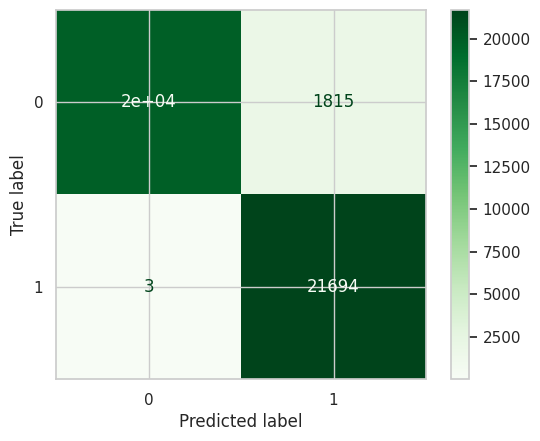

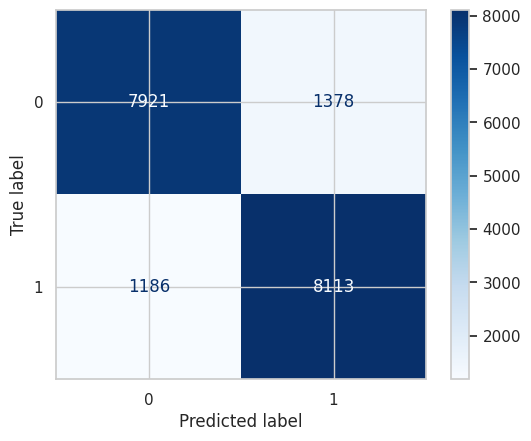

In [41]:
print('Confusion Matrix Train: \n', ConfusionMatrixDisplay.from_estimator(dtc, train_tr, y_train, cmap='Greens'))
print('Confusion Matrix Test: \n', ConfusionMatrixDisplay.from_estimator(dtc, test_tr, y_test, cmap='Blues'))

## Random Forest

In [42]:
rfc.fit(train_tr, y_train)

RandomForestClassifier(random_state=0)

In [43]:
# cross-val
rfc_pipe = Pipeline([
        ('preprocess', full_pipeline),
        ('model', RandomForestClassifier(random_state=0))
    ])

scores_rfc = cross_val_score(rfc_pipe, X_train, y_train,
                        scoring='accuracy', cv=10)
print(scores_rfc)
print(scores_rfc.mean())

[0.85023041 0.85437788 0.84447005 0.83686636 0.84351233 0.85134824
 0.83844204 0.85849274 0.84535607 0.84189906]
0.8464995172919922


Confusion Matrix Train: 
Confusion Matrix Test: 


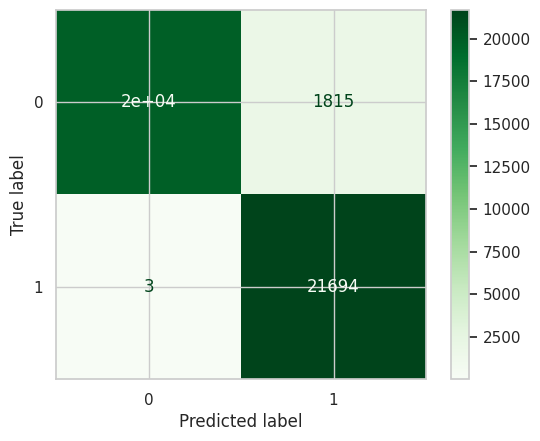

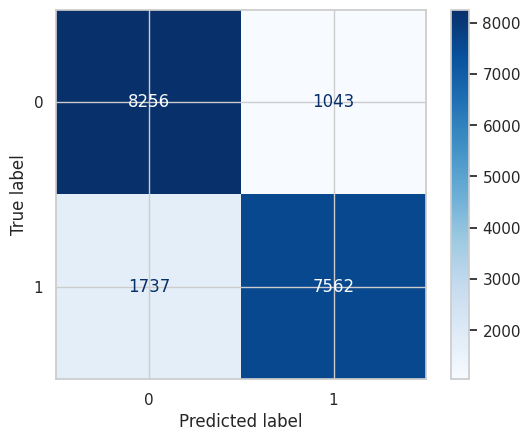

In [44]:
print('Confusion Matrix Train: \n', ConfusionMatrixDisplay.from_estimator(rfc, train_tr, y_train, cmap='Greens'))
print('Confusion Matrix Test: \n', ConfusionMatrixDisplay.from_estimator(rfc, test_tr, y_test, cmap='Blues'))

Berdasarkan pemodelan diatas kita dapat lihat bahwa akurasi yang didapatkan ketiga model berbeda2, seperti sebagai berikut


*   Logistic regression memiliki tingkat akurasi sebesar 53 %
*   Decision tree memiliki tingkat akurasi sebesar 85%
*   Random forest classifier memiliki tingkat akurasi sebesar 84%

Maka dari itu decision tree merupakan model yang memiliki performa terbaik dan akan dilakukan hyperparameter tuning untuk meningkatkan performa akurasi dari model tersebut.



#hyperparameter tuning

In [45]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Lakukan GridSearchCV dengan menggunakan parameter grid yang telah ditentukan
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(train_tr, y_train)
best_model = grid_search.best_estimator_
# Cetak hyperparameter terbaik dan skor akurasi terbaik
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best Accuracy: 0.8529980909061965


Dapat kita lihat bahwa best parameter yang didapatkan dengan grid search ialah 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'

In [46]:
dtc_train_tuned = best_model.predict(train_tr)
dtc_test_tuned = best_model.predict(test_tr)

print("Classification Report (Train Data):")
print(classification_report(y_train, dtc_train_tuned))

print("Classification Report (Test Data):")
print(classification_report(y_test, dtc_test_tuned))

Classification Report (Train Data):
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     21697
           1       0.92      1.00      0.96     21697

    accuracy                           0.96     43394
   macro avg       0.96      0.96      0.96     43394
weighted avg       0.96      0.96      0.96     43394

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      9299
           1       0.85      0.87      0.86      9299

    accuracy                           0.86     18598
   macro avg       0.86      0.86      0.86     18598
weighted avg       0.86      0.86      0.86     18598



Berdasarkan klasifikasi report diatas dapat kita lihat bahwa ternyata model ini overfit namun tetap memiliki akurasi yang cukup baik yaitu sebesar 86%

# Save Model

In [47]:
AllProcess = Pipeline([
    ("preprocess", full_pipeline),
    ("classification", best_model)
])
AllProcess

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['income', 'age',
                                                   'experience',
                                                   'current_job_years',
                                                   'current_house_years']),
                                                 ('cat1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['married', 'house_ownership',
                                                   'car_ownership',
                                                   'Profession_Group',
                                                   'state'])])),
                ('classification',
                 DecisionTreeClassifier(random_state=0, splitter='random'))])

In [48]:
joblib.dump(AllProcess, open('FinalProject.pkl', 'wb'))

In [49]:
Data.to_csv('data.csv', index=False)

# Kesimpulan



> Model yang telah dibuat ini memiliki kemampuan yang cukup baik dalam memprediksi pelanggan yang berpotensi gagal membayar pinjaman. Dengan akurasi sebesar 86%, model dapat memberikan informasi yang berharga kepada perusahaan untuk mengidentifikasi pelanggan yang berisiko dan juga dengan model ini perusahaan dapat menganalisis faktor-faktor yang berkontribusi terhadap pelanggan yang berisiko gagal membayar pinjaman. Ini dapat memberikan wawasan berharga kepada perusahaan untuk memahami karakteristik dan perilaku pelanggan yang berpotensi menjadi masalah.




